# Project 2 #

In [82]:
import numpy as np
from numpy import linalg as la

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt

In [100]:
def set_matrix(nodes=5, D=1./(3.*3.62e-2), sigma_a=0.15, w=10.):
    n = nodes - 1
    dx = w / n
    offdiag = -D / dx**2
    matrix = np.eye(n) * (sigma_a + 2. * D / dx**2)
    matrix[0][0] = 0.5 * sigma_a + D / dx**2
    for i in range(n)[1:-1]:
        matrix[i][i-1] = offdiag
        matrix[i][i+1] = offdiag
    matrix[0][1] = offdiag
    matrix[n-1][n-2] = offdiag
    
    nusig = 0.157
    S = np.resize(np.array([nusig]), (n))
    S[0] = S[0] * 0.5
    
    return (matrix, S)

In [101]:
nodes = 5

In [102]:
k = 1.

In [103]:
A, S = set_matrix(nodes=nodes, w=5.14)

In [104]:
A

array([[  5.65152841,  -5.57652841,   0.        ,   0.        ],
       [ -5.57652841,  11.30305683,  -5.57652841,   0.        ],
       [  0.        ,  -5.57652841,  11.30305683,  -5.57652841],
       [  0.        ,   0.        ,  -5.57652841,  11.30305683]])

In [105]:
S

array([ 0.0785,  0.157 ,  0.157 ,  0.157 ])

In [106]:
b = np.resize(np.array([10.]), (nodes-1))
b

array([ 10.,  10.,  10.,  10.])

In [107]:
k_error = 1.0
b_error = 1.0

In [108]:
min_error = 0.001
num_iterations = 0

In [109]:
while k_error > min_error or b_error > min_error:
    b = np.multiply(b, S) / k
    
    b_old = b
    k_old = k
    
    # b = np.dot(np.linalg.inv(A), b) * k
    b = la.solve(A, b * k)
    
    m = np.dot(b, b)**0.5
    m_old = np.dot(b_old, b_old)**0.5
    
    k = m / m_old
    
    k_error = (k - k_old) / k
    
    b_error = np.linalg.norm(b - b_old) / (nodes - 1)
    
    num_iterations += 1

/Users/jrpowers-luhn/miniconda3/envs/nuc/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in double_scalars
/Users/jrpowers-luhn/miniconda3/envs/nuc/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in double_scalars


In [110]:
b

array([  2.64872508e-148,   2.44710289e-148,   1.87293146e-148,
         1.01362320e-148])

In [111]:
b_old

array([  6.71263206e-163,   1.24033267e-162,   9.49309530e-163,
         5.13762615e-163])

In [112]:
k_error

nan

In [113]:
b_error

1.0470005177321481e-148

In [114]:
A

array([[  5.65152841,  -5.57652841,   0.        ,   0.        ],
       [ -5.57652841,  11.30305683,  -5.57652841,   0.        ],
       [  0.        ,  -5.57652841,  11.30305683,  -5.57652841],
       [  0.        ,   0.        ,  -5.57652841,  11.30305683]])

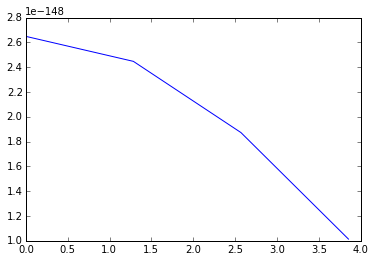

In [115]:
plt.plot(np.linspace(0,5.14,nodes)[:-1],b)
plt.show()

In [156]:
def flux(nodes, width, sigma_a, sigma_f, sigma_tr, e_max=0.001, max_iterations=1e5):
    D = 1. / (3. * sigma_tr)
    A, S = set_matrix(nodes=nodes, w=width, D=D, sigma_a=sigma_a)
    b = np.ones_like(S) * 0.01
    
    k_error = 100
    b_error = 100
    
    num_iterations = 0
    
    k = 1.0
    
    while k_error > min_error or b_error > min_error and num_iterations < max_iterations:
        b = (np.multiply(b, S) / k) / la.norm(np.multiply(b, S) / k)

        b_old = b
        k_old = k

        # b = np.dot(np.linalg.inv(A), b) * k
        b = la.solve(A, b * k)

        m = la.norm(b)
        m_old = la.norm(b_old)
        
        k = m / m_old

        k_error = (k - k_old) / k

        b_error = np.linalg.norm(b - b_old) / (nodes - 1)

        num_iterations += 1
        
        print num_iterations, b, k
    return np.append(b, 0)

/Users/jrpowers-luhn/miniconda3/envs/nuc/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in double_scalars
/Users/jrpowers-luhn/miniconda3/envs/nuc/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in double_scalars
/Users/jrpowers-luhn/miniconda3/envs/nuc/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in multiply


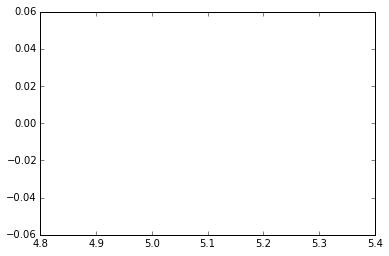

In [138]:
for i in [5]:
    plt.plot(np.linspace(0, 5.14, i), flux(i, 5.14, 0.15, 1, 3.62e-2))
plt.show()

In [157]:
flux(5, 5.14, 0.15, 1, 3.62e-2)

1 [ 0.67305389  0.63237068  0.50922674  0.3003097 ] 1.09653636677
2 [ 0.82020369  0.75998822  0.58633523  0.32064468] 1.3026581276
3 [ 0.9841201   0.90962474  0.69701643  0.37772505] 1.55705416233
4 [ 1.17795014  1.08835813  0.83313445  0.45096992] 1.86268001004
5 [ 1.4094492   1.30217414  0.99666506  0.53940463] 2.22856526576
6 [ 1.68635579  1.55799181  1.19243941  0.64534581] 2.66636780682
7 [ 2.01764948  1.86406544  1.42669462  0.77212194] 3.1901848272
8 [ 2.41402502  2.23026837  1.70697363  0.92380754] 3.81690884602
9 [ 2.88826972  2.66841329  2.04231513  1.105293  ] 4.56675542913
10 [ 3.45568158  3.19263348  2.44353588  1.32243209] 5.46391232841
11 [ 4.13456369  3.81983877  2.92357803  1.58222903] 6.5373192032
12 [ 4.94681485  4.57026099  3.49792633  1.89306409] 7.82160104375
13 [ 5.91863591  5.46810658  4.18510759  2.2649639 ] 9.35818505831
14 [ 7.08137501  6.54233743  5.00728829  2.70992489] 11.1966369923
15 [ 8.47253873  7.82760512  5.99098959  3.2423002 ] 13.3962599753
16 [ 10

/Users/jrpowers-luhn/miniconda3/envs/nuc/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in double_scalars
/Users/jrpowers-luhn/miniconda3/envs/nuc/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in divide


array([ nan,  nan,  nan,  nan,   0.])

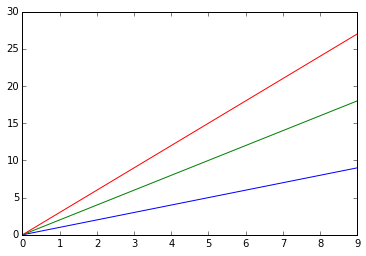

In [129]:
x = np.arange(10)
for a in [1.0, 2.0, 3.0]:
    plt.plot(x, a*x)
plt.show()